In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from background_trials import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from plthelper import plot_hist_fit
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [2]:
############################################################
######################SIMULATION SETUP######################
############################################################

distance = 10 *u.kpc
distance_range = np.arange(1,3,1) * u.kpc
samples = 10000000

# detector scope
add_wls = True
detector_scope = "Gen2"

# time resolution
sim_dt = 1 * u.ms
res_dt = 1 * u.ms

# SN model
model = {'name': 'Sukhbold_2015',
        'param':{
            'progenitor_mass': 27*u.Msun, 
            'eos': 'LS220'}
        }

sim = Simulation(model=model,
                distance=distance, 
                res_dt=res_dt,
                Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                tmin=0.000*u.s, tmax=1*u.s, dt=sim_dt,
                hierarchy = 'normal',
                mixing_scheme = 'NoTransformation',
                detector_scope = detector_scope,
                add_wls = add_wls)
sim.run()

In [3]:
############################################################
#######################ANALYSIS SETUP#######################
############################################################

time_win = [0, 0.35] * u.s # time independent
freq_res = 1 * u.Hz 
freq_win = [75, 1E6] * u.Hz # freq independent
hanning = False

ft_mode = "FFT"
fft_para = {"time_res": res_dt, 
            "time_win": time_win,
            "freq_res": freq_res,
            "freq_win": freq_win,
            "hanning": hanning}

ana_para = {"model": model,
            "distance": distance,
            "res_dt": res_dt,
            "mode": ft_mode,
            "ft_para": fft_para}

In [4]:
bgt = Background_Trials(sim, ana_para=ana_para, samples = samples, verbose=True)
#bgt.ts_fit_quant(distance_range=distance_range, samples=samples, distribution="lognorm")
bgt.load_data("./files/background/GENERATE_model_Sukhbold_2015_27_mode_FFT_samples_1e+07_distance_{:.0f}kpc.npz".format(distance.value))

bins = 1000
bgt.ts_binned(bins = bins)
bgt.ts_to_pvalue(bins = bins)

bkg_fit = np.load("./files/background/FIT_model_Sukhbold_2015_27_mode_FFT_samples_1e+07_lognorm.npz")

100%|██████████| 1000/1000 [00:07<00:00, 127.47it/s]


/home/jakob/software/ASTERIA/ASTERIA/docs/gen2-ana/plthelper.py:364: RuntimeWarning: divide by zero encountered in divide
  rax0.plot(ts_xhist, (ts_yhist-fit_func.pdf(ts_xhist))/ts_yhist, color='k')
/home/jakob/software/ASTERIA/ASTERIA/docs/gen2-ana/plthelper.py:382: RuntimeWarning: invalid value encountered in divide
  rax1.plot(ts_xhist, (zscore-norm.isf(fit_func.sf(ts_xhist)/2))/zscore, color='C1', ls = "--")


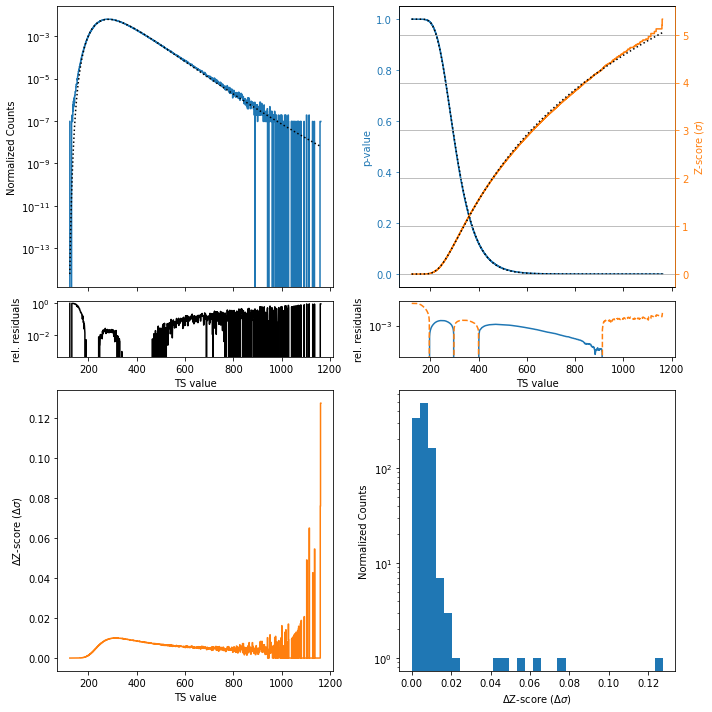

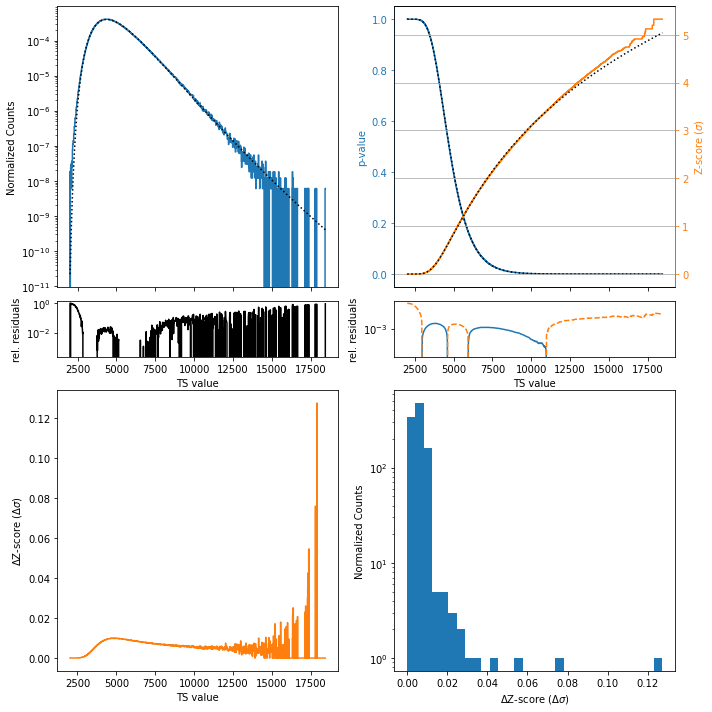

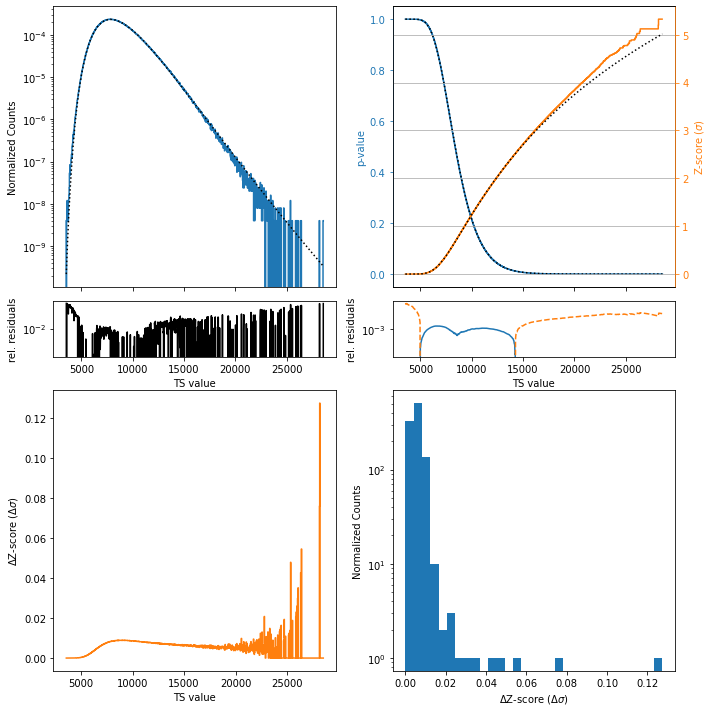

In [5]:
distr = lognorm
for det in ["ic86", "gen2", "wls"]:

    fit_params = bkg_fit[det][bkg_fit["dist"] == distance.value][0]
    fit_func = distr(*fit_params)

    plot_hist_fit(bgt.ts_binned, fit_func, bgt.pvalue, bins = bins, det = det)
    #plt.savefig("./plots/background/MAPPING_model_{}_{:.0f}_mode_{}_bins_{:1.0e}_distance_{:.0f}kpc_det_{}_norm.pdf"
    #            .format(model["name"], model["param"]["progenitor_mass"].value, ft_mode, bins, distance.value, det))

In [7]:
distance_range = np.arange(1,61,1) * u.kpc
bins = 10000

for dist in tqdm(distance_range):
    ana_para = {"model": model,
            "distance": dist,
            "res_dt": res_dt,
            "mode": ft_mode,
            "ft_para": fft_para}
    

    bgt = Background_Trials(sim, ana_para=ana_para, samples = samples, verbose=True)
    bgt.load_data("./files/background/GENERATE_model_Sukhbold_2015_27_mode_FFT_samples_1e+07_distance_{:.0f}kpc.npz".format(dist.value))
    bgt.ts_binned(bins = bins)

100%|██████████| 60/60 [00:30<00:00,  1.98it/s]


In [8]:
for dist in tqdm(distance_range):
    np.load("./files/background/MAPPING_model_Sukhbold_2015_27_mode_FFT_samples_1e+07_bins_{}_distance_{:.0f}kpc.npz".format(bins, dist.value))

100%|██████████| 60/60 [00:00<00:00, 2012.40it/s]
